# Canada Immigration EDA Project
This project is a case study of data on immigraton collected and distributed by the United Nations. The original data is available on the UN website[International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows). 
In this notebook, we will upload the data, perform data wrangling to get the data in the right shape for analysis, and use basic visualization techniques to understand the data deeply. There is no discussion of the results because the purpose of the project is to understand the data better so we can start generating ideas of the kind of inferences we can search for from the dataset. In an ideal situation, this would be an early stage of a larger data analysis project. In this particular case, it is a personal project I did to practie my data analysis and visualization skills.

## Table of Contents
* Importing Libraries and Dataset
* Understanding the data
* Data wrangling
* Data visualization
    - Line plots
    - Area plots
    - Histogram
    - Barplot
    - Pie chart
    - Box plot
    - Scatter plot
    - Bubble Plot
    - Waffle Chart
* Making subplots
* Making plots directly with plotly
* Conclusion 
* Author Credits

## Importing libraries and dataset

In [ ]:
#Uncomment this cell if you have not installed any ofthese libraries. Otherwise, continue to the next cell
#!pip install pywaffle pandas seaborn numpy urlib matplotlib

In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
from pywaffle import Waffle
import urllib

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
#we start by loading the data onto the notebook environment
#the first 20 rows are a header format and the last two rows are a footer, so we skip those

## Understanding the data
Before we can start wrangling the data, we understand what it is and what for it takes. The next few cells gice an overview of different characteristics of the dataset: a sample of the first five entries of the dataset, information about the dataframe, a list of column names, index, dimensions of the dataframe, and the datatypes contained in the different columns.

In [4]:
#understand our data in a few cells
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df_can.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [5]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [8]:
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [10]:
df_can.shape

(195, 43)

In [11]:
df_can.dtypes

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

## Data Wrangling
Now we do some preprocessing to make the data more usable in the next steps of the analysis. We will drop columns that are not useful for the project, rename columns to more relatable names,feature engneering to introduce new coumns from the existing columns, check for empty entries, check the statistical summary, change the index to countris so we can call the variables easily,change all th ecolumn names into strings to avoid abiguity, and change  create a list of years whcih we will use for analysis later.

In [12]:
#drop rows we will not be using for this project
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [13]:
#Rename columns to more relatable names
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace = True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
#feature engineering: make a new column that includes the sum of all the immigrants from 1980 to 2013
df_can['Total'] = df_can.sum(axis = 1, numeric_only = True)
df_can['Total']

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Name: Total, Length: 195, dtype: int64

In [15]:
#check for null objcets
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [16]:
#statistical summary
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [17]:
#fix the country column as index to make search easier
df_can.set_index('Country', inplace = True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [18]:
#to view number of immigrants from Japan for instance
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [19]:
df_can[df_can.index=='Japan']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [20]:
#to view all immigrants from Haiti
df_can[df_can.index == 'Haiti']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Haiti,Latin America and the Caribbean,Caribbean,Developing regions,1666,3692,3498,2860,1418,1321,1753,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


In [22]:
#all immigrants from Haiti in the years between 1995 and 2008
df_can.loc['Haiti', [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]]

1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
Name: Haiti, dtype: object

In [21]:
#to avoid ambiguity caused by having column names that are integers...
df_can.columns = list(map(str, df_can.columns))

In [20]:
for x in df_can.columns.values:
    print (type(x))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'str'>


In [22]:
#declare a variable to allow us to easily call upon the full range of years
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [26]:
#example of use of this variable
df_can.loc['Haiti',years]

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

We can use conditions to call variables as in the first few examples, and sort dataframe based on variables

In [27]:
#to filter based on a criteria, first we pass a condition as a boolean vector
condition = df_can['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [28]:
#then we pass this condition into the dataframe
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [29]:
#we can pass multiple conditions
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [30]:
#just did this to see the immigration trend in my hometurf
df_can_ea = df_can[(df_can['Continent']=='Africa') & (df_can['Region'] == 'Eastern Africa')]
df_can_ea.sort_values(by='Total', ascending=False, axis=0)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Somalia,Africa,Eastern Africa,Developing regions,7,10,7,12,14,10,37,...,1198,1061,1166,1015,1214,1528,1535,1582,2028,42109
Ethiopia,Africa,Eastern Africa,Developing regions,98,59,54,98,154,157,302,...,1506,1801,1512,1613,1289,1865,2163,1864,1606,35136
Kenya,Africa,Eastern Africa,Developing regions,291,296,221,201,218,245,244,...,693,622,449,453,489,507,585,725,664,17228
Mauritius,Africa,Eastern Africa,Developing regions,306,259,353,170,207,164,325,...,696,512,507,714,872,1455,1146,799,1203,15690
United Republic of Tanzania,Africa,Eastern Africa,Developing regions,635,832,621,474,473,460,403,...,274,291,195,230,136,200,215,224,182,12496
Eritrea,Africa,Eastern Africa,Developing regions,0,0,0,0,0,0,0,...,528,700,699,799,904,931,1182,1335,1719,10450
Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,...,615,454,663,611,508,494,434,437,407,8598
Burundi,Africa,Eastern Africa,Developing regions,0,0,0,0,1,2,1,...,626,468,614,448,566,529,604,684,480,8110
Rwanda,Africa,Eastern Africa,Developing regions,6,6,8,4,3,0,9,...,378,360,420,358,415,396,492,562,415,6691


In [28]:
#we sort the total coumn by descending order and extract the top 5 immigrating countries
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = df_can.head(5)
top_5
#we will use this dataframe to create our first type of plots: the line plot

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


## Data Visualisation
While data visualisaion is a common technique used in data storytelling, it is also useful in exploratory data analysis as it makes it easier to identify patterns, trends, and outliers in large datasets. In this project we will use lineplots, area plots, histograms, bar charts, pie charts, box plots, scatter plots, bubble lots, and waffle charts.

### Line Plots
We use line plots to visualize the relationship between two continuous variables. A common use case is to plot the change of a continuous variable over time.

In [23]:
#we will use a pandas plot function to study immigration patterns from Haiti in relation to the 2010 eathquake
haiti = df_can.loc['Haiti', years] 
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

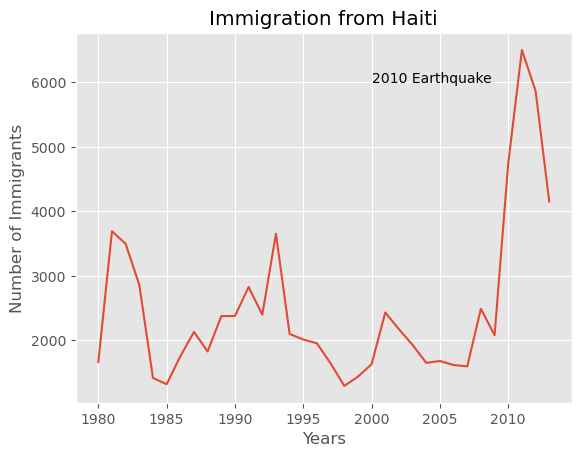

In [33]:

haiti.index = haiti.index.map(int) #change years to int
haiti.plot(kind='line')

#to meet best practices, we will label the axis, and give the plot a title
plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # identify the spike in immigration on the map

plt.show() 

In [25]:
#dataframe for immigration from India and China
df_chi = df_can.loc[['China','India'], years].transpose()
df_chi.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


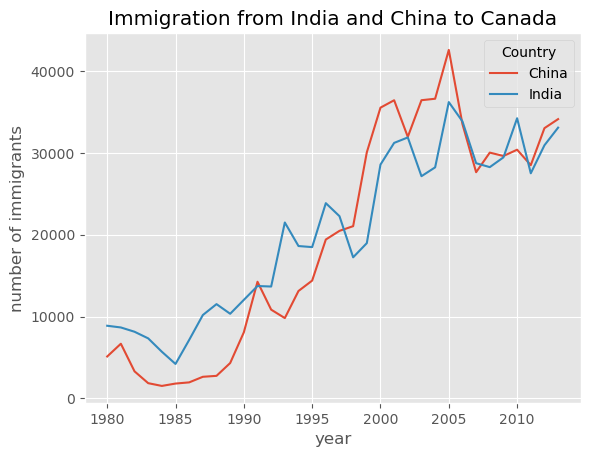

In [26]:
df_chi.plot(kind = 'line')
plt.title('Immigration from India and China to Canada')
plt.xlabel('year')
plt.ylabel('number of immigrants')
plt.show()

In [38]:
#to plot the top 5 immigranting countries:
#we sort the total coumn by descending order and extract the top 5 immigrating countries
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = df_can.head(5)
top_5
#we will use this dataframe to create our first type of plots: the line plot
top_5 = top_5[years].transpose()
top_5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


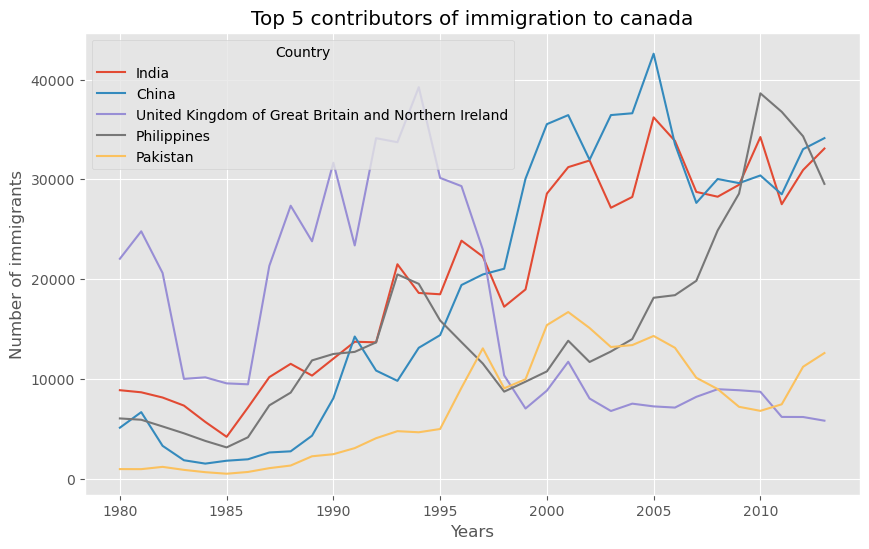

In [34]:
top_5.plot(kind = 'line', figsize = (10, 6))
plt.title('Top 5 contributors of immigration to canada')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

### Area Plots
SImilar to Line Plots, area plots are mad by changing the kind parameter to area. It displays the magnitude/proportion of multiple variables.

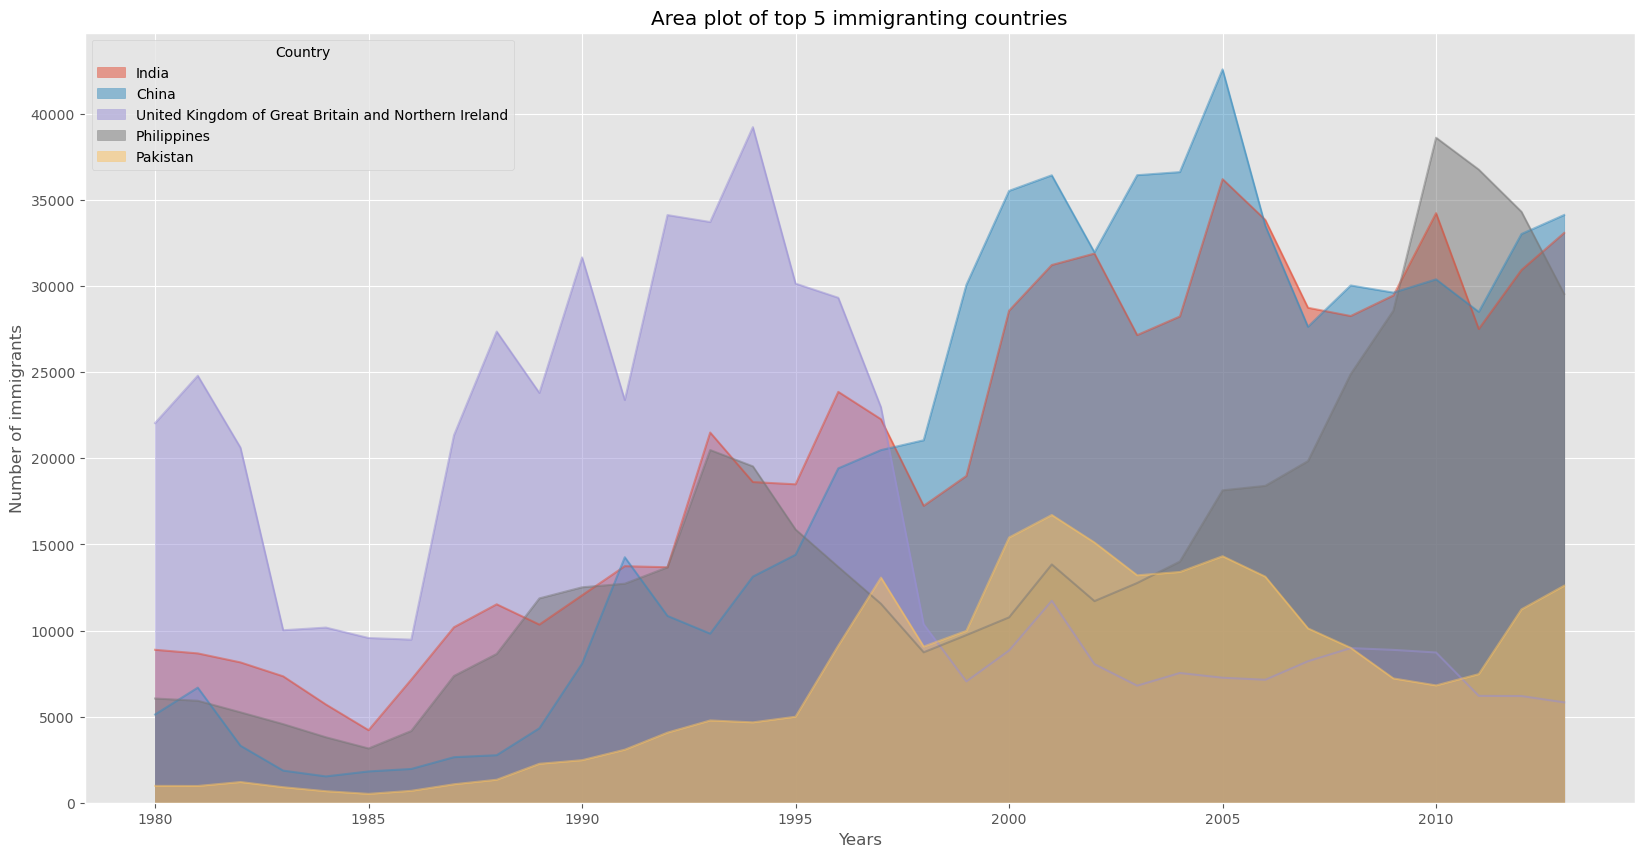

In [42]:
#Change the index values of df_top5 to integers for plotting
top_5.index = top_5.index.map(int)

top_5.plot(kind ='area',
            stacked = False,
            figsize = (20, 10))

plt.title('Area plot of top 5 immigranting countries')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

Text(0.5, 0, 'Years')

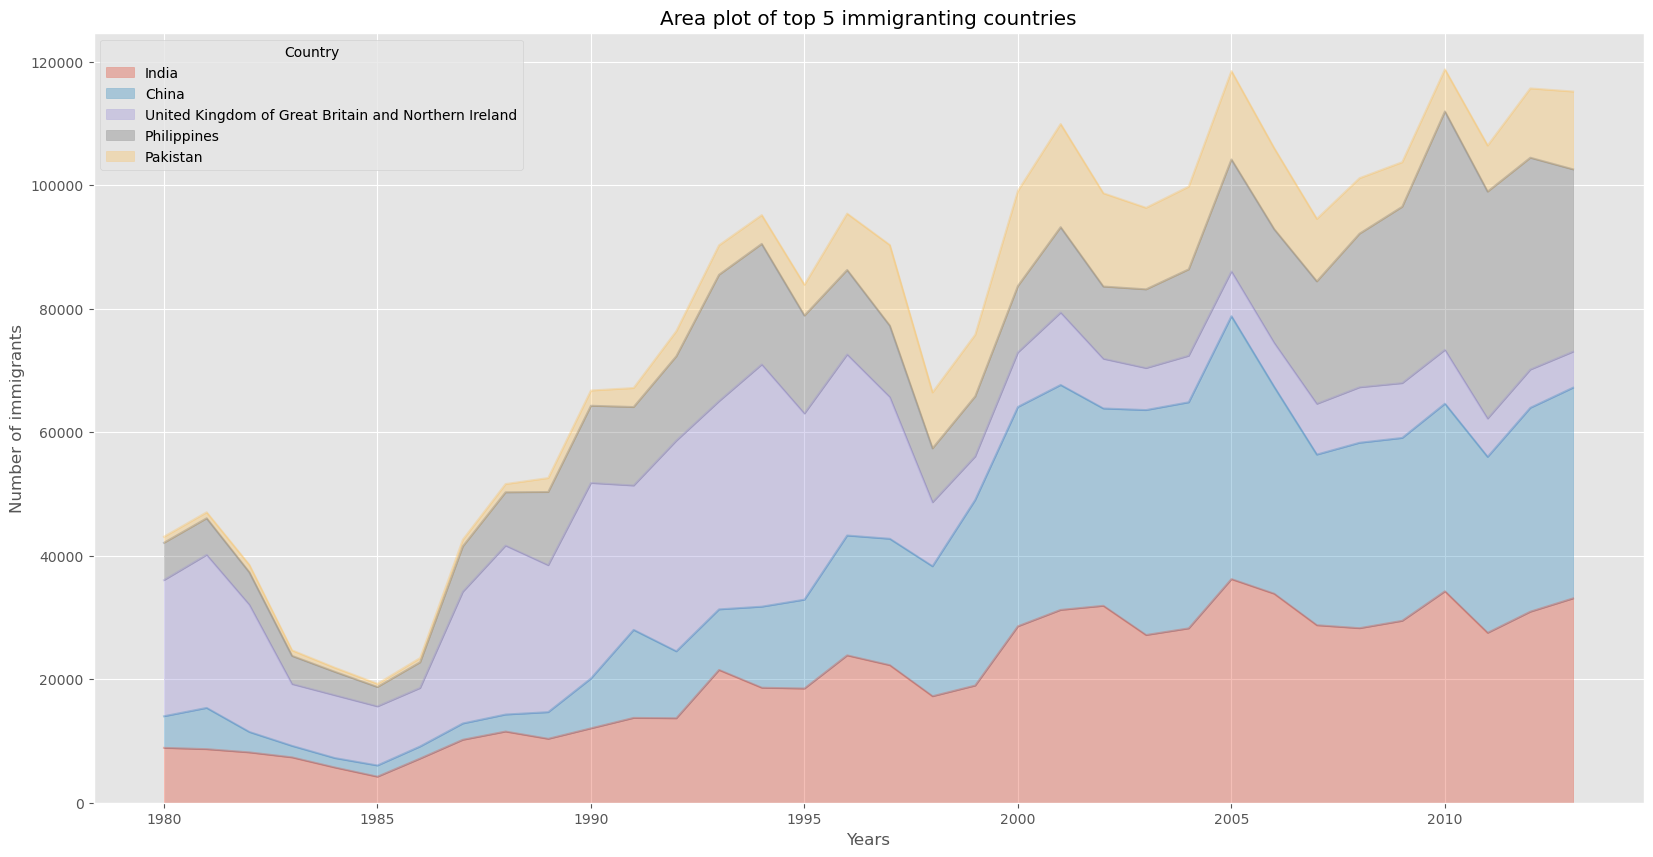

In [43]:
#to create the same plot using an object_oriented method using the artist layer...
ax = top_5.plot(kind = 'area', alpha = 0.35, figsize = (20,10))

ax.set_title('Area plot of top 5 immigranting countries')
ax.set_ylabel('Number of immigrants')
ax.set_xlabel('Years')

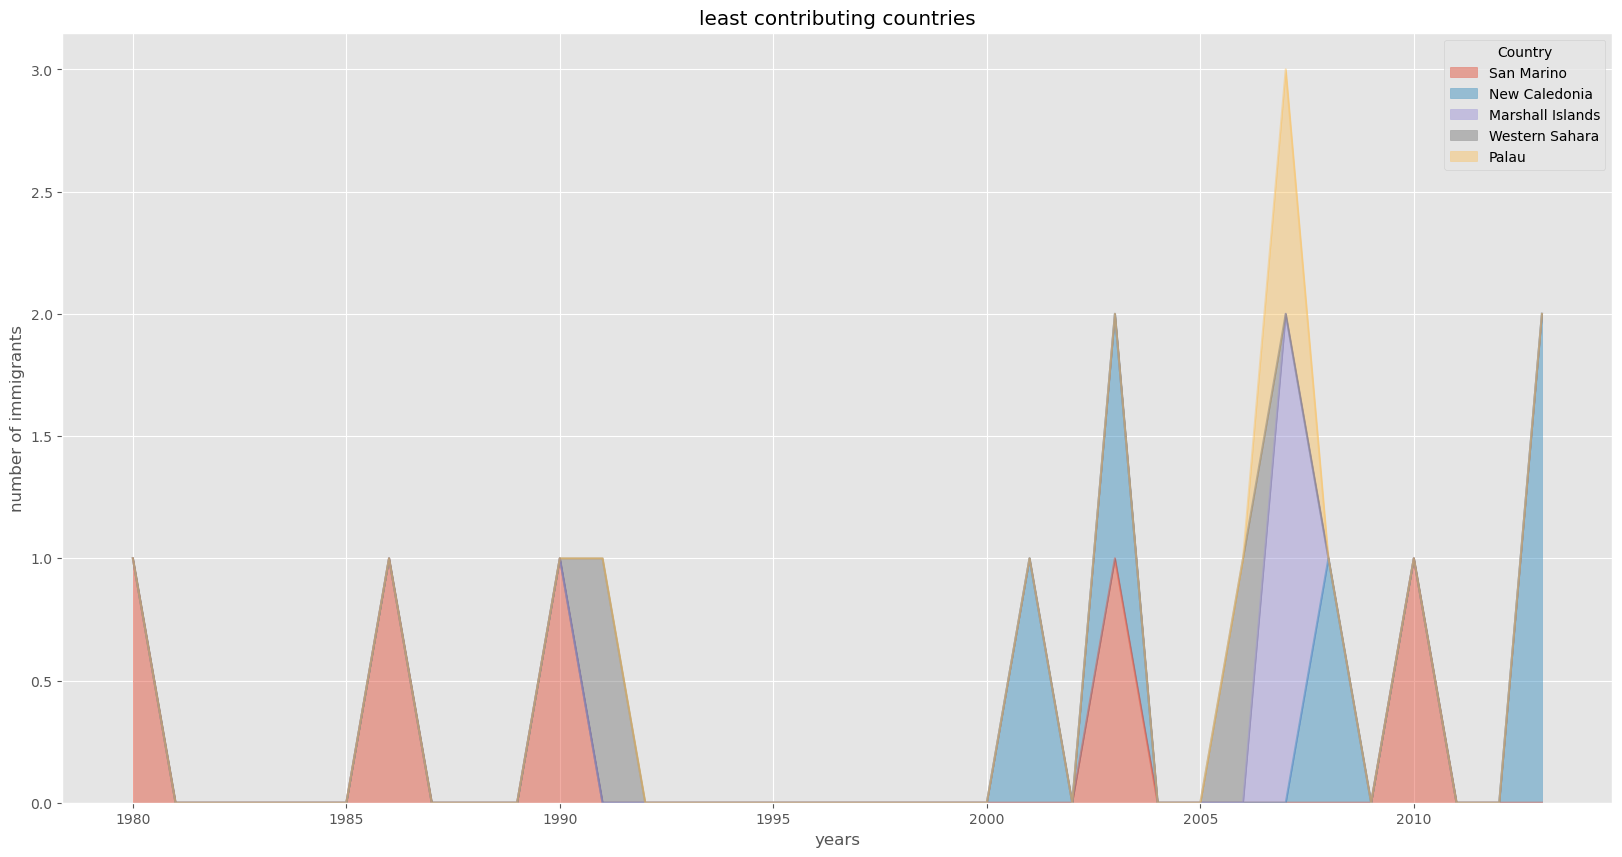

In [44]:
#Using scripting layer to make an area plot of least contributing countries
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()

df_least5.index = df_least5.index.map(int)
df_least5.plot(kind = 'area', alpha = 0.45, stacked = True, figsize = (20,10))
plt.title('least contributing countries')
plt.xlabel('years')
plt.ylabel('number of immigrants')
plt.show()

### Histograms
Histograms represent frequency distribution of continuous variales by assigning each datapoint to a bin and counting the number of data points in each bin then represeniting that on a bar structure.
Our first exercise will be to compare the distribution of the immigrants to Canada afrom various countries.

In [45]:
#we start by dividing the data into bins
df_can['2013'].head()

count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

#This shows that there were less than 3412 immigrants to Canada from 178 countirs in 2013.

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


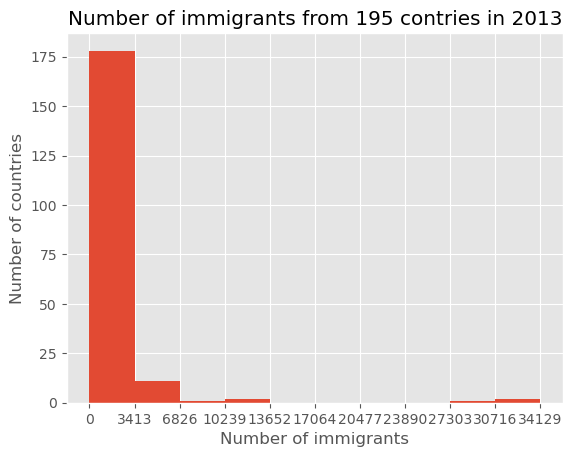

In [46]:
#we can make the xticks align with the bins by adding the xticks arguement to the plot function
df_can['2013'].plot(kind ='hist', fig = (8,5), xticks = bin_edges)
plt.title('Number of immigrants from 195 contries in 2013')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')
plt.show()

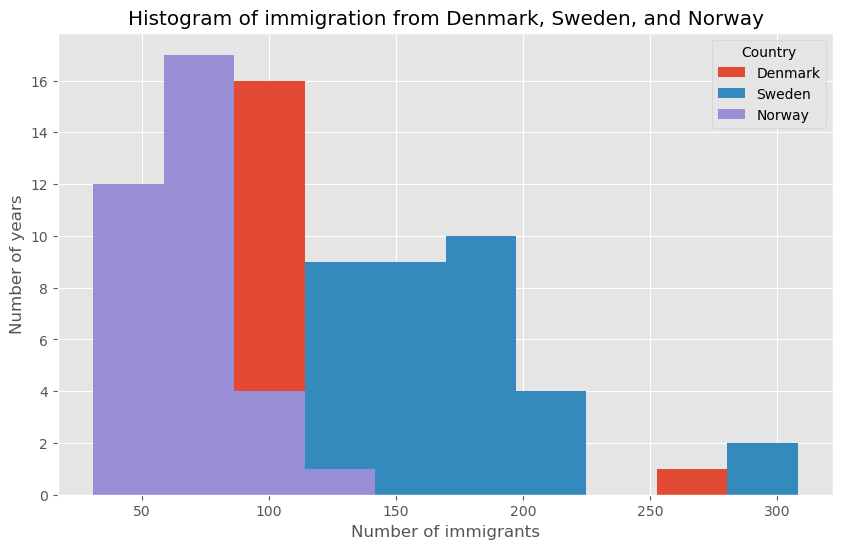

In [47]:
#we can plot multiple histograms on the same plot
df_t = df_can.loc[['Denmark', 'Sweden','Norway'],years].transpose()
df_t.head()

df_t.plot.hist(figsize=(10,6))
plt.title('Histogram of immigration from Denmark, Sweden, and Norway')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of years')
plt.show()

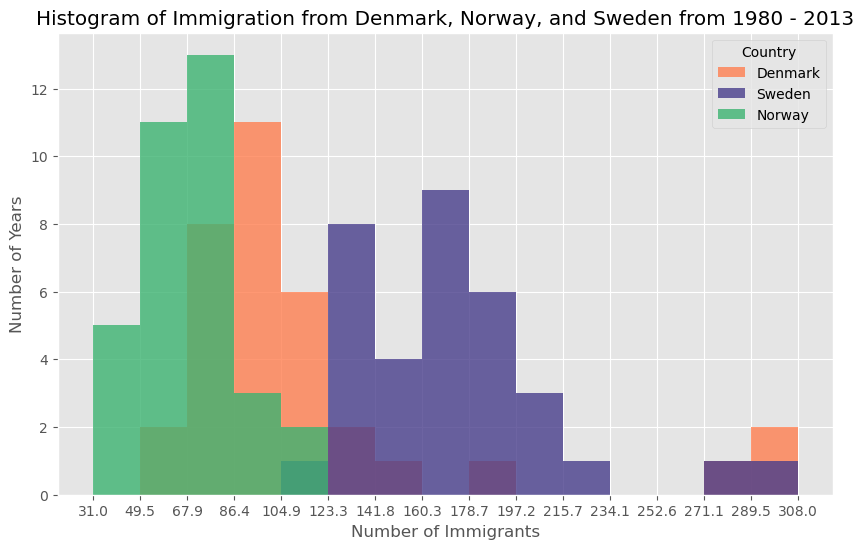

In [49]:
#let us improve the quality of the last plot
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.8,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

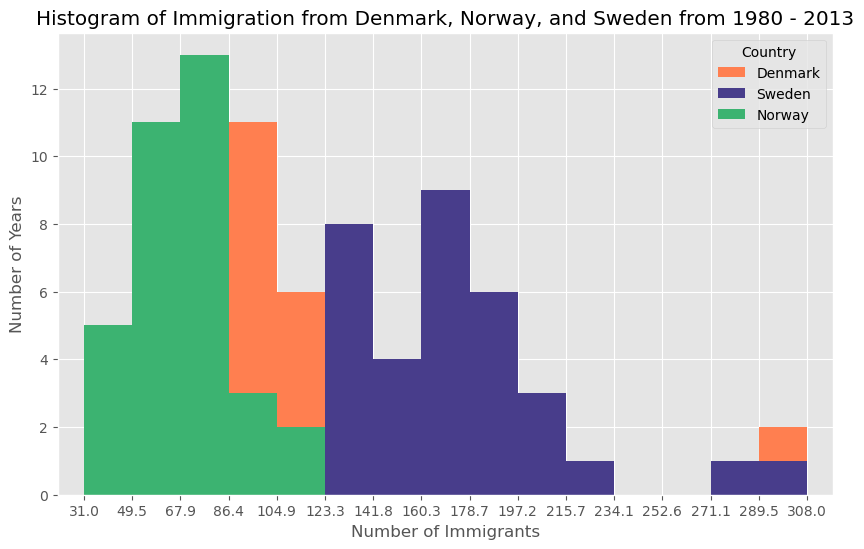

In [50]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=False,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

### Bar charts
We use bar charts to represent magnitude of features: the number of observation of each categorical variable are represented by the height of the bar. Let us consider Iceland during the 2008 - 2011 financial crisis.

In [51]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

Text(0, 0.5, 'Number of immigrants')

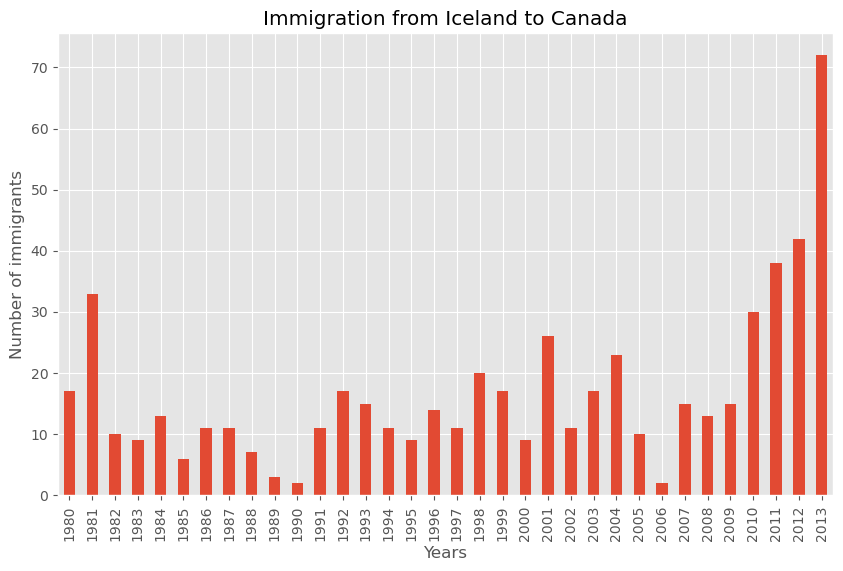

In [52]:
df_iceland.plot(kind = 'bar', figsize = (10, 6))
plt.title('Immigration from Iceland to Canada')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

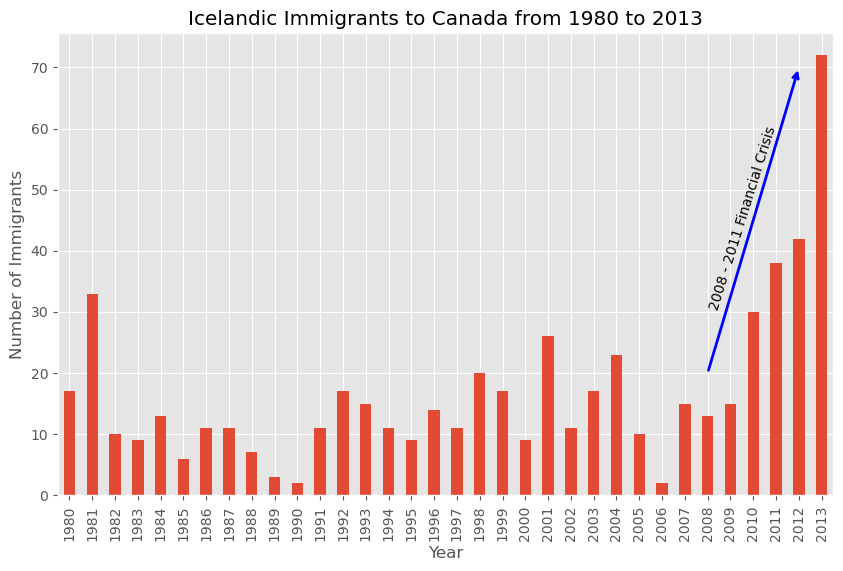

In [51]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

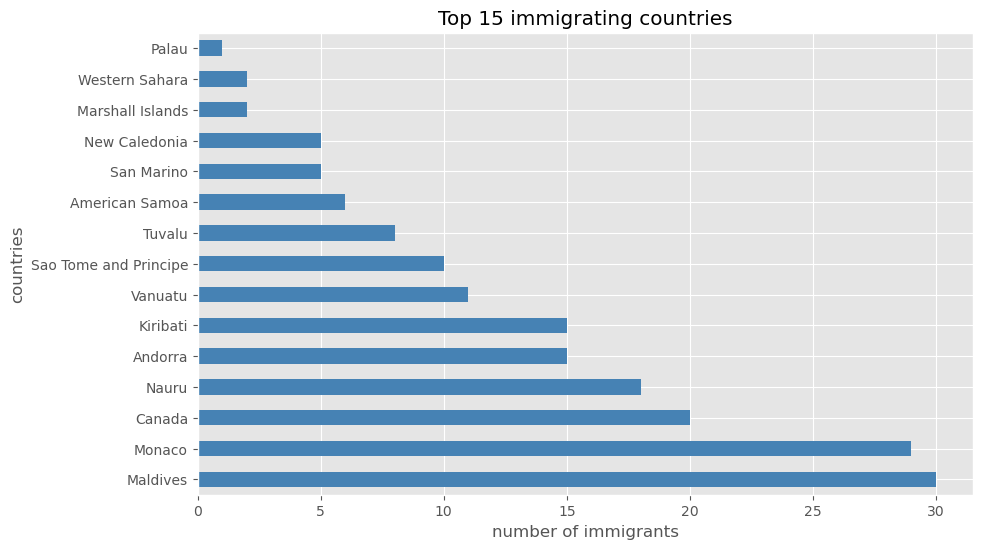

In [54]:
## kind = 'barh' makes a tilted bar graph with horizontal bars for easieer labelling o categories.
df_top15 = df_can.tail(15)
df_top15['Total'].plot(kind = 'barh', figsize = (10,6), color = 'steelblue')

plt.title('Top 15 immigrating countries')
plt.ylabel('countries')
plt.xlabel('number of immigrants')
plt.show()

### Pie Charts
Pie charts represent numberic proportions of continuous variables as segments of a circle. 
We shall group the data by continents and store the value of the total sum of immigrants from each continent in a new variable, then plot a pie chart to represent that data.

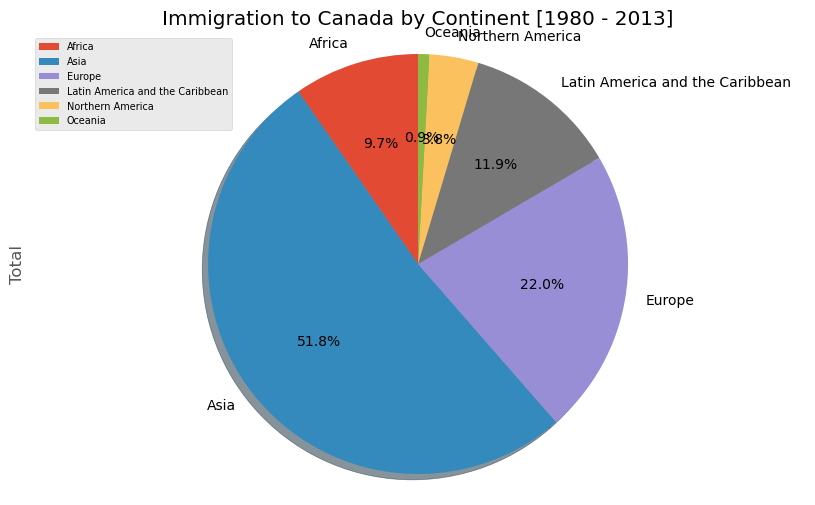

In [59]:
df_continent = df_can.groupby('Continent', axis=0).sum(numeric_only = True)


df_continent['Total'].plot(kind='pie', figsize = (10,6), autopct ='%1.1f%%', startangle=90, shadow = True )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continent.index, loc='upper left', fontsize = 7) 

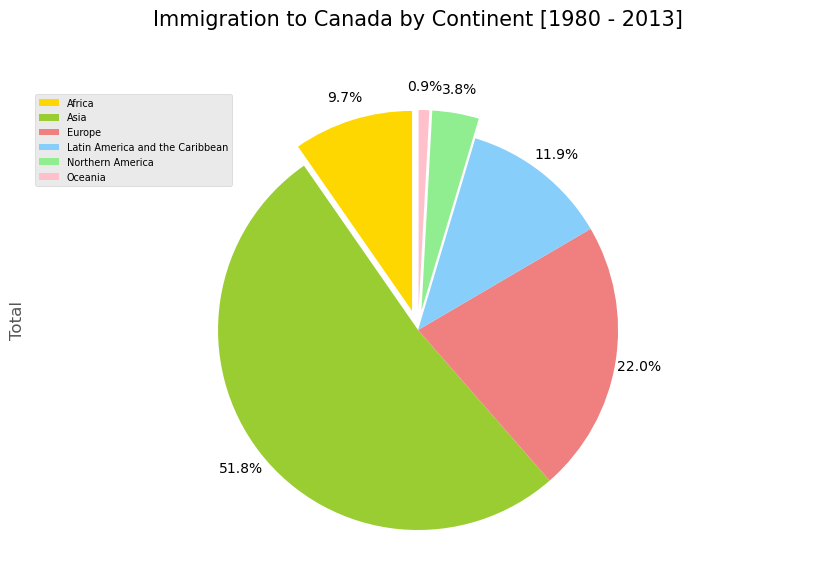

In [60]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continent['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=7) 

plt.show()

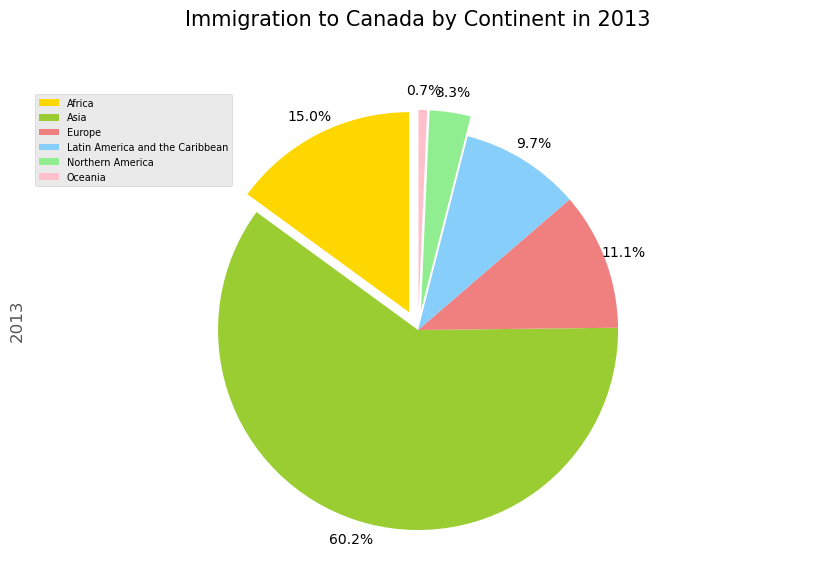

In [61]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continent['2013'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=7) 

plt.show()

### Boxplots
The boxplot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. It is alo good for representing outliers.
Let us make a boxplot of Japan between the years 1980 to 2013

Text(0, 0.5, 'No. of immigrants')

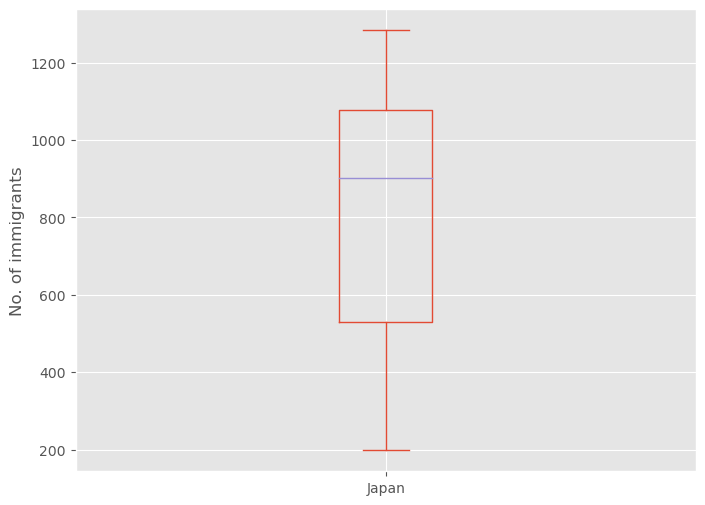

In [62]:
#first isolate the data into a new dataframe
df_japan = df_can.loc[['Japan'], years].transpose()


df_japan.plot(kind = 'box', figsize = (8,6))
plt.ylabel('No. of immigrants')

In [57]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [63]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Text(0.5, 0, 'Country')

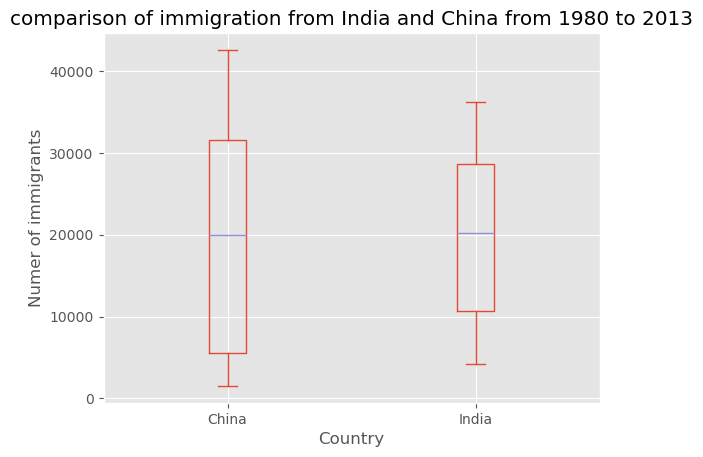

In [65]:
df_CI.plot(kind = 'box')
plt.title('comparison of immigration from India and China from 1980 to 2013')
plt.ylabel('Numer of immigrants')
plt.xlabel('Country')

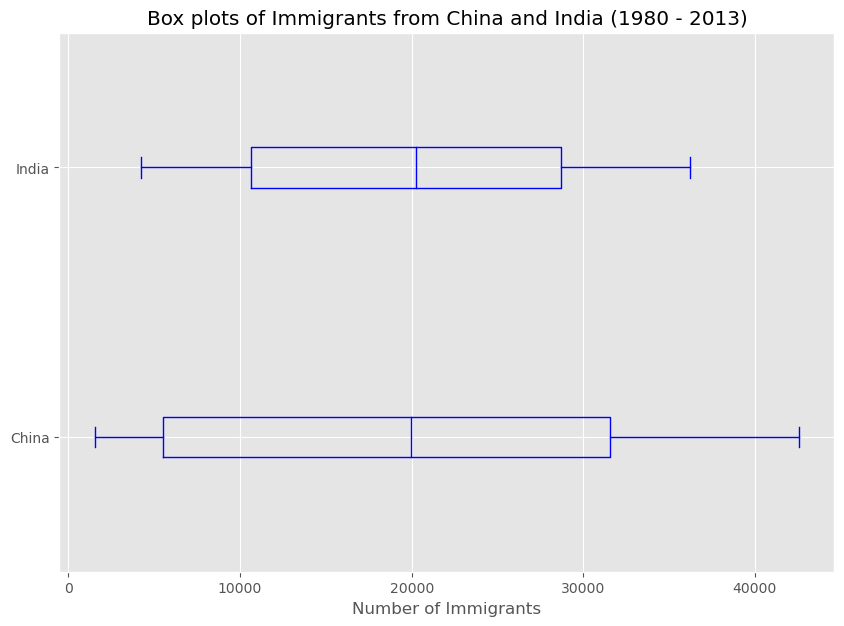

In [66]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

### subplots
We can make more than one plot in the same figure as in the following examples...

Text(0, 0.5, 'Yumber of immigrants')

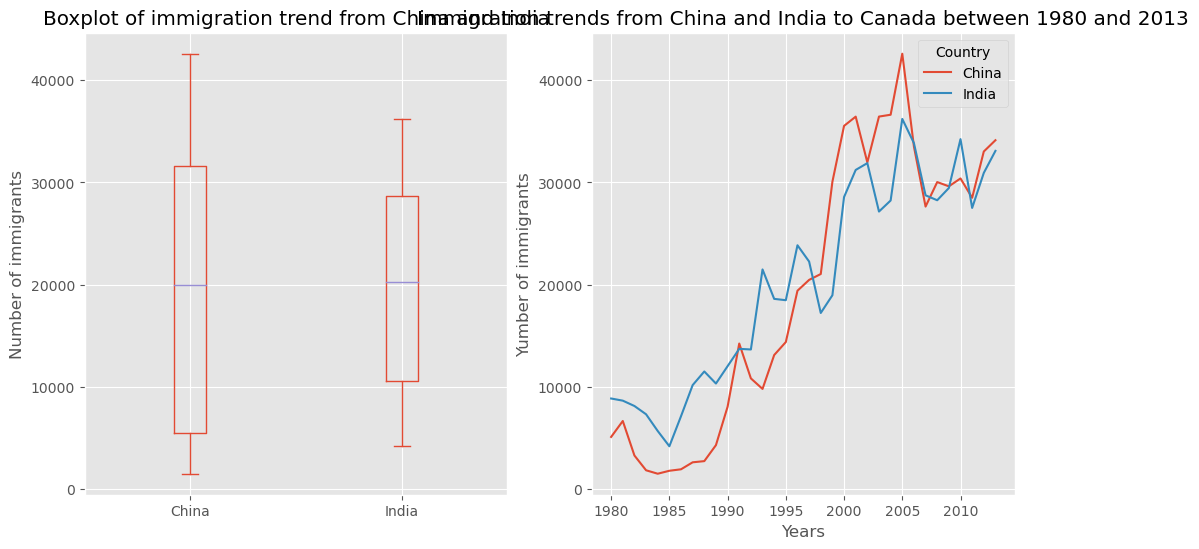

In [68]:
#to make two subplots we create a figure
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_CI.plot(kind = 'box', ax = ax0, figsize = (12,6))
ax0.set_title('Boxplot of immigration trend from China and India')
ax0.set_ylabel('Number of immigrants')

df_CI.plot(kind = 'line', ax = ax1, figsize = (12,6))
ax1.set_title('Immigration trends from China and India to Canada between 1980 and 2013')
ax1.set_xlabel('Years')
ax1.set_ylabel('Yumber of immigrants')


In [69]:
#Now we look at the top 15 countries based on total immigration in each decade
#First let us make a boxplot of the top 15 countries based on total immigration
df_can = df_can.sort_values(['Total'], ascending = False)
df_top15 = df_can.head(15)

#make a list of years in each decade
years_80s = list(map(str, range(1980, 1989)))
years_90s = list(map(str, range(1990, 1999)))
years_00s = list(map(str, range(2000, 2009)))

#Slice the original dataframe to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis = 1)
df_90s = df_top15.loc[:, years_90s].sum(axis = 1)
df_00s = df_top15.loc[:, years_00s].sum(axis = 1)

#merge the three series into a new dataframe
new_df = pd.DataFrame(({'1980s':df_80s, '1990s':df_90s, '2000s':df_00s}))
new_df.head()

,1980s,1990s,2000s
Country,,,
India,71811,161421,274135
China,27680,131459,310763
United Kingdom of Great Britain and Northern Ireland,155376,254921,74537
Philippines,48899,128748,144331
Pakistan,8330,55323,120381


Text(0.5, 1.0, 'Boxplots representing the distribution of immigrants from the top 15 countries in each decade')

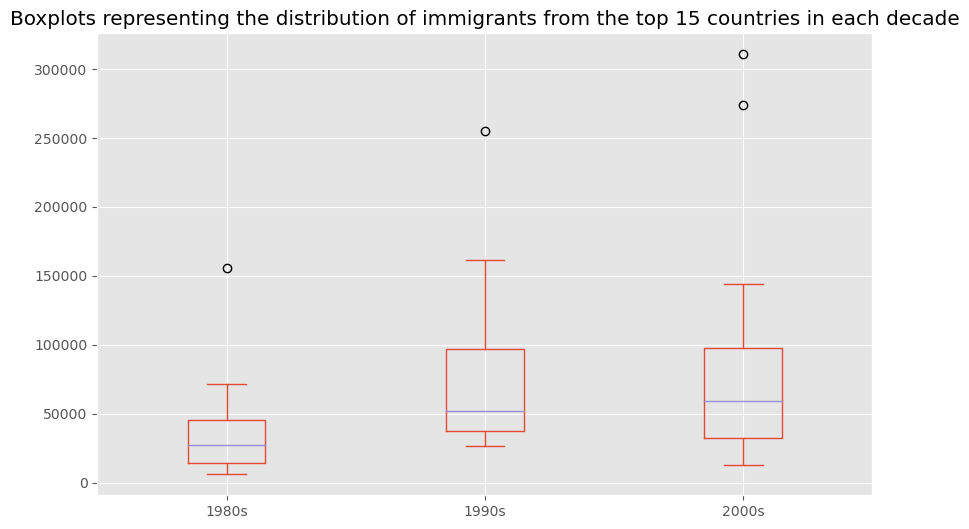

In [70]:
#make boxplots
new_df.plot(kind = 'box', figsize=(10,6))
plt.title('Distribution of immigrants from the top 15 countries in each decade')

### Scatterplots
Scatterplots repersent two continuous variables as individual points on a 2d plane.
Let us use a scatterplot to visualize the trend of total immigration to Canada for the years 1980 to 2013

In [71]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)

df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


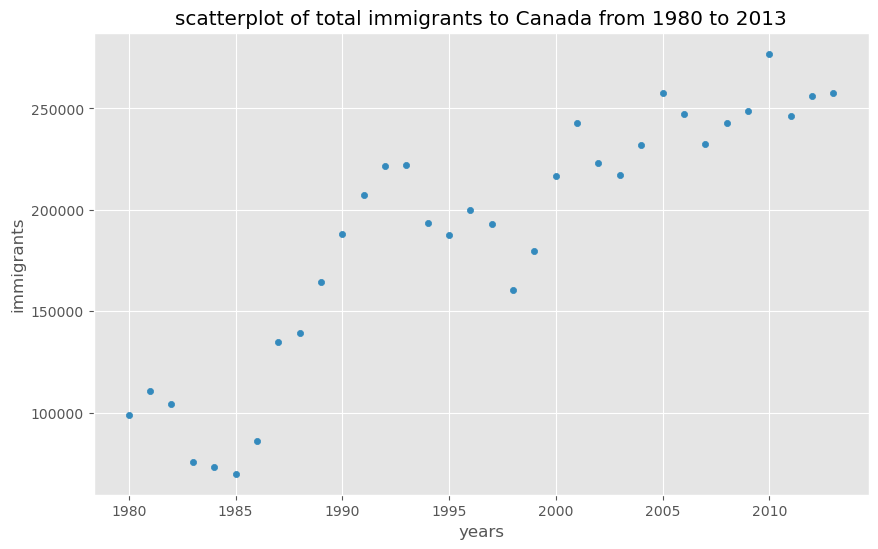

In [72]:
#Let us create a scatterplot

df_tot.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10, 6))
plt.title('scatterplot of total immigrants to Canada from 1980 to 2013')
plt.xlabel('years')
plt.ylabel('immigrants')
plt.show()

In [73]:
#Let us fit a regression line to the data using numpy's function polyfit()
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg = 1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

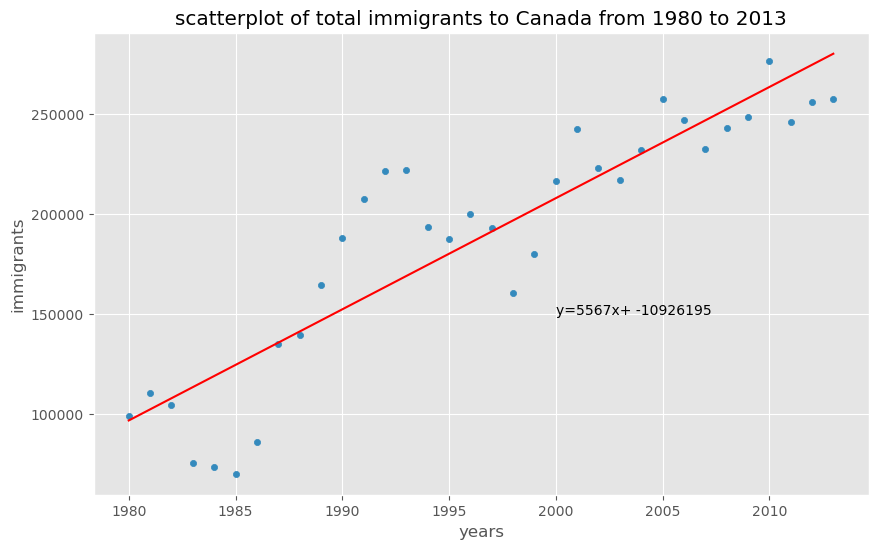

In [74]:
df_tot.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10, 6))
plt.title('scatterplot of total immigrants to Canada from 1980 to 2013')
plt.xlabel('years')
plt.ylabel('immigrants')

plt.plot(x, fit[0]*x + fit[1], color = 'red')
plt.annotate('y={0:.0f}x+ {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()

<Axes: xlabel='year', ylabel='total'>

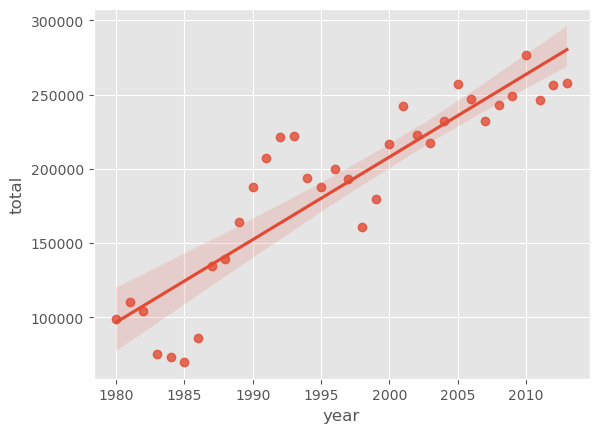

In [75]:
sns.regplot(x = 'year', y = 'total', data = df_tot) #same plot as above using seaborn

In [76]:
#Let us plot the immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013
df_countries = df_can.loc[['Norway', 'Sweden', 'Denmark'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis = 1))
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'number of immigrants']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,number of immigrants
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


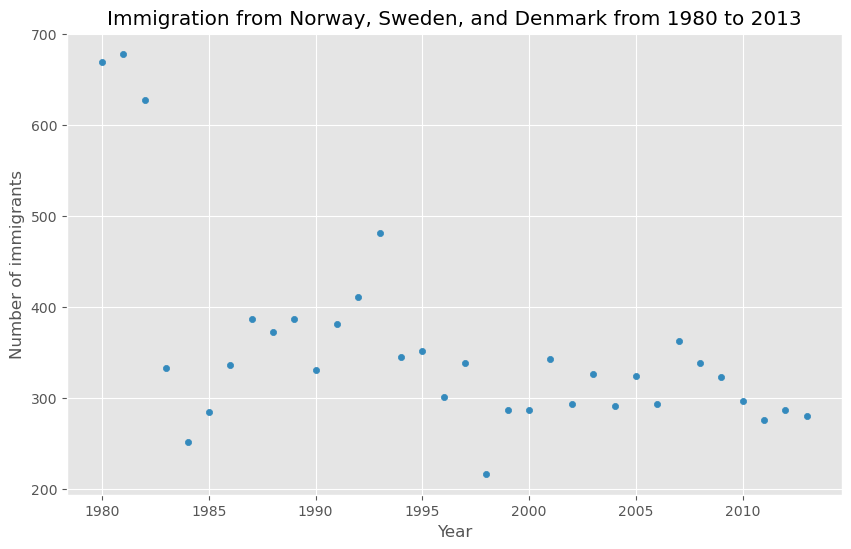

In [77]:
df_total.plot(kind = 'scatter', x = 'year', y = 'number of immigrants', figsize = (10, 6))
plt.title('Immigration from Norway, Sweden, and Denmark from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.show()

### Bubble plots
Bubble plots are relational chart design to compare three or more variables: x axis, y axis, size, color.
We shall compare immigration between Argentina and Brazil to understand the effect of the economic crisis in Argentina from 1998 to 2002.


In [78]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [79]:
#use feature scaling to normalize the data for Argentina and Brazil
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

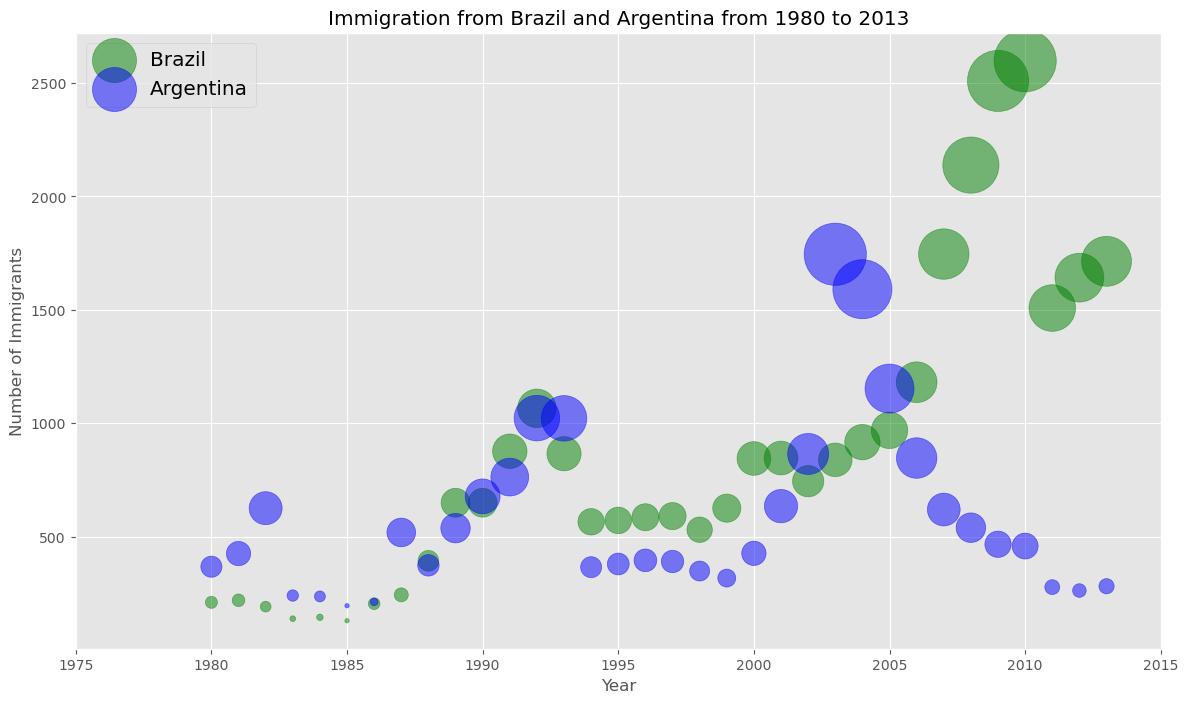

In [80]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

## Making plots directly with Plotly
We can creat a plotly object and then add subplots to it.

In [81]:
#create a dataframe with years and totals only
y = list(map(str, years))

df_line = df_can[years]

total_immigrants = df_line.sum()
total_immigrants


1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

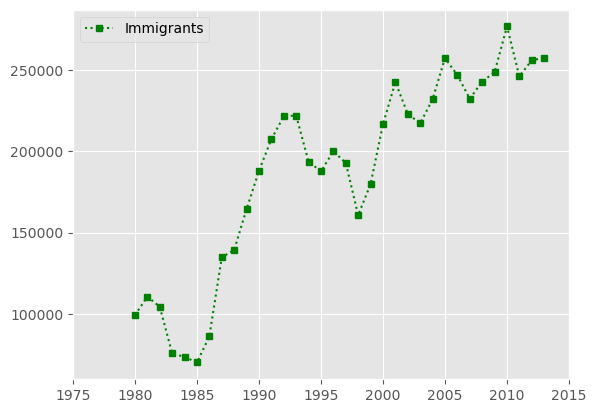

In [82]:
fg, ax = plt.subplots()

total_immigrants.index = total_immigrants.index.map(int)

ax.plot(total_immigrants, marker = 's', markersize = 5, color = 'green', linestyle = 'dotted')
ax.set_title = 'Immigration between 1980 and 2013'
ax.set_xlabel = 'Years'
ax.set_ylabel = 'Number of immigrants'

plt.xlim(1975, 2015)
plt.grid(True)
plt.legend(['Immigrants'])
plt.show()

In 2010 there was an earthquake in Haiti that caused the displacement of around three million people. As part of their humanitarian efforts, the government of Canada stepped up its effort to accept refugees from Haiti. Let us make a line graph of immigration from Haiti to see if the data reflects that.

In [83]:
df_haiti = df_can.loc['Haiti', years]
df_haiti.columns = ['Year', 'Immigrants']


In [84]:
df_haiti = df_can[df_can.index == 'Haiti']
df_haiti = df_haiti[years].transpose()
df_haiti.head()

Country,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


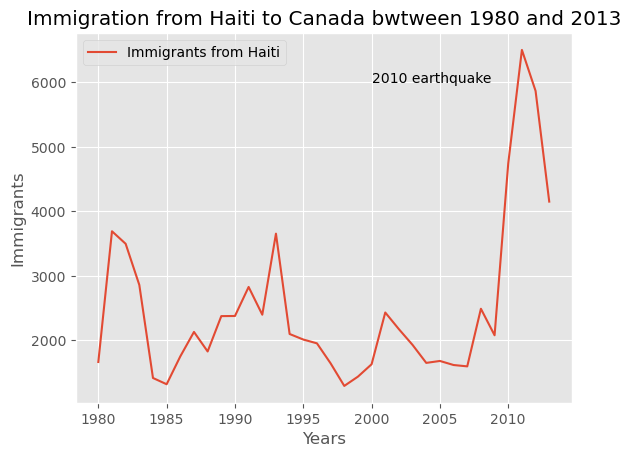

In [85]:
fig, ax = plt.subplots()

df_haiti.index = df_haiti.index.map(int)
ax.plot(df_haiti)
ax.set_title('Immigration from Haiti to Canada bwtween 1980 and 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Immigrants')
plt.legend(['Immigrants from Haiti'])
ax.annotate('2010 earthquake', xy = (2000, 6000))
plt.show()

Let us make another lineplot for the total number of immigrants to Canada each year.

In [86]:
df_years = df_can[years]
df_sum = df_years.sum()
df_sum

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

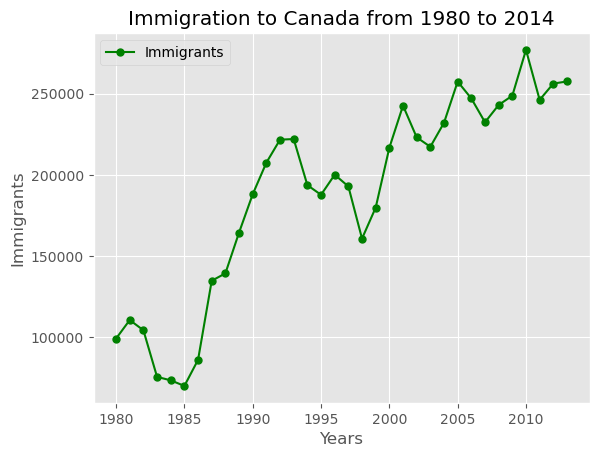

In [87]:
fig, ax = plt.subplots()

df_sum.index = df_sum.index.map(int)

ax.plot(df_sum, marker = 'o', markersize = 5, color = 'green')

ax.set_title('Immigration to Canada from 1980 to 2014')
ax.set_xlabel('Years')
ax.set_ylabel('Immigrants')

plt.grid(True)
plt.legend(['Immigrants'])
plt.show()

We can use a barplot to represent categorical data where the height of each bar corresponds to the value of a specific category.
Let us visualize the 5 countries that contributed least to immigration to Canada

In [88]:
df_can.sort_values(['Total'], axis = 0, inplace = True)
df_least5 = df_can.head(5)
df_least5b = df_least5.reset_index()
label = list(df_least5b.Country)

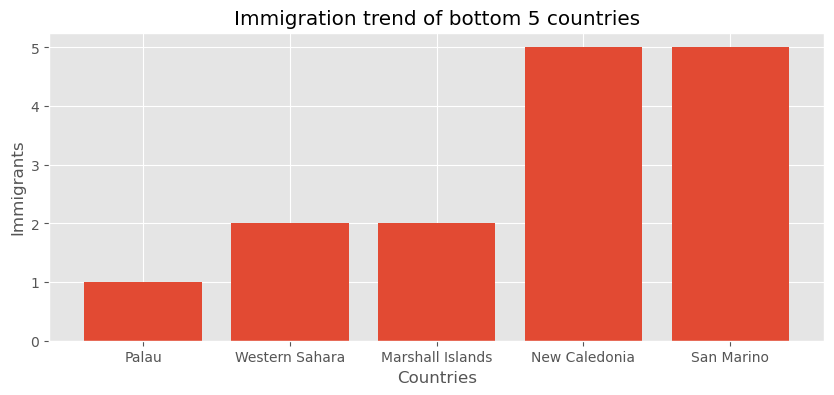

In [89]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.bar(label, df_least5b['Total'], label = label)
ax.set_title('Immigration trend of bottom 5 countries')
ax.set_xlabel('Countries')
ax.set_ylabel('Immigrants')
plt.show()

Let us represent the frequency distribution of immigrants to canada on a histogram.

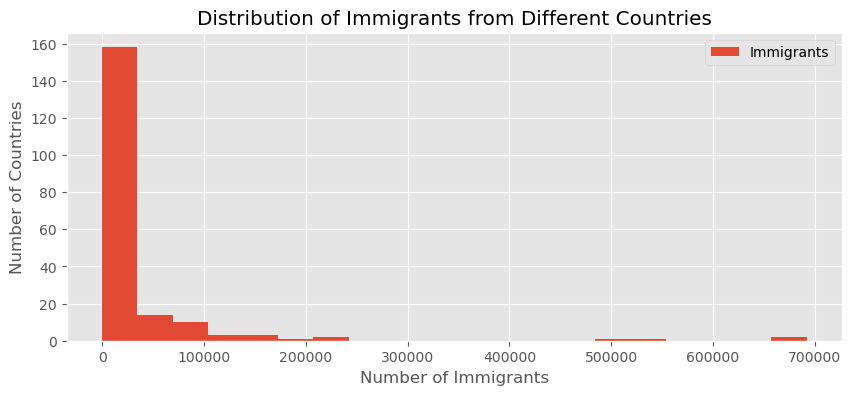

In [90]:
df_country = df_can.groupby(['Country'])['Total'].sum().reset_index()

#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_country['Total'], bins = 20)
ax.set_title('Distribution of Immigrants from Different Countries') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

#Display the plot
plt.show()

Here is a comparison of distribution of number of immigrants from Denmark, Norway, and Sweden over the years.

In [92]:
df=df_can.groupby(['Country'])[years].sum()
df_dns=df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns=df_dns.T
df_dns.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


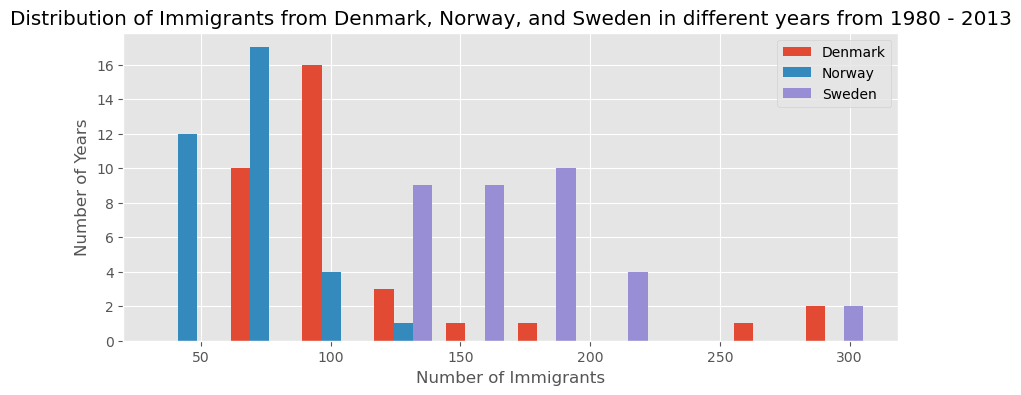

In [93]:

#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_dns)
ax.set_title('Distribution of Immigrants from Denmark, Norway, and Sweden in different years from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])
#Display the plot
plt.show()

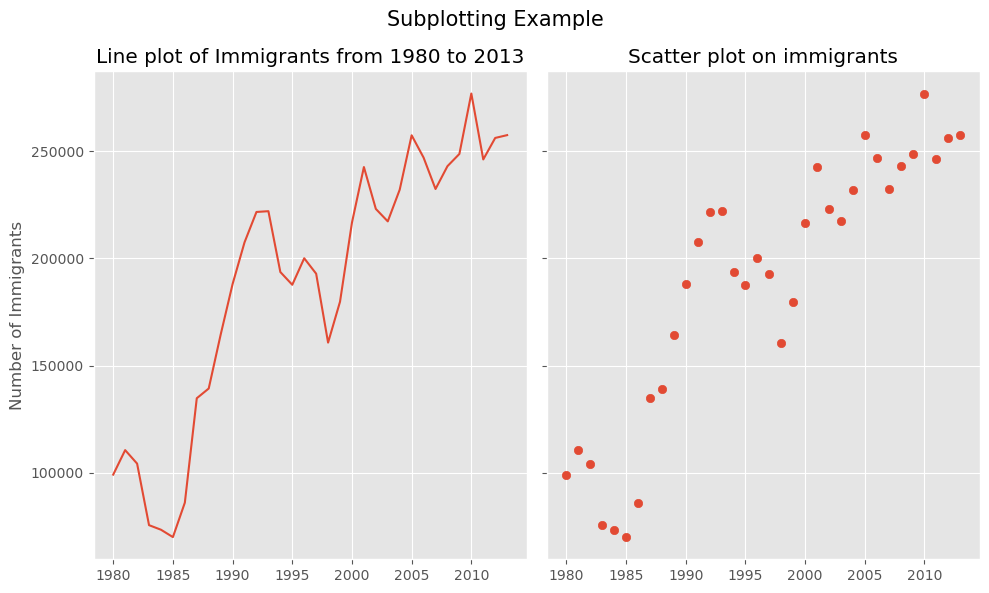

In [96]:
#subplotting
fig, axs = plt.subplots(1, 2, sharey=True, figsize = (10, 6))

#Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot of Immigrants from 1980 to 2013")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

### Waffle Charts
There is a python module dedicated to the creation of waffle charts, but first let us make a waffle chart ba mking our own function.
We start by determining the proportions of the data we are representing, make  rectangular grid divided into smaller square tiles, and represent the data as a shaded portion of tiles in the grid.

In [97]:
df_dsn = df_can.loc[['Denmark', 'Norway','Sweden'], :]
total_values = df_dsn['Total'].sum()
cat_prop = df_dsn['Total']/total_values

pd.DataFrame({'Category Proportion': cat_prop})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [98]:
#Define the overall size of the waffle chart
width = 40
height = 10

total_num_tiles = width*height

total_num_tiles

400

In [99]:
#use proportion of each category to determine number of tiles
tiles_per_cat = (cat_prop*total_num_tiles).round().astype(int)
pd.DataFrame({'Number of tiles':tiles_per_cat})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [100]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_cat[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


<Figure size 640x480 with 0 Axes>

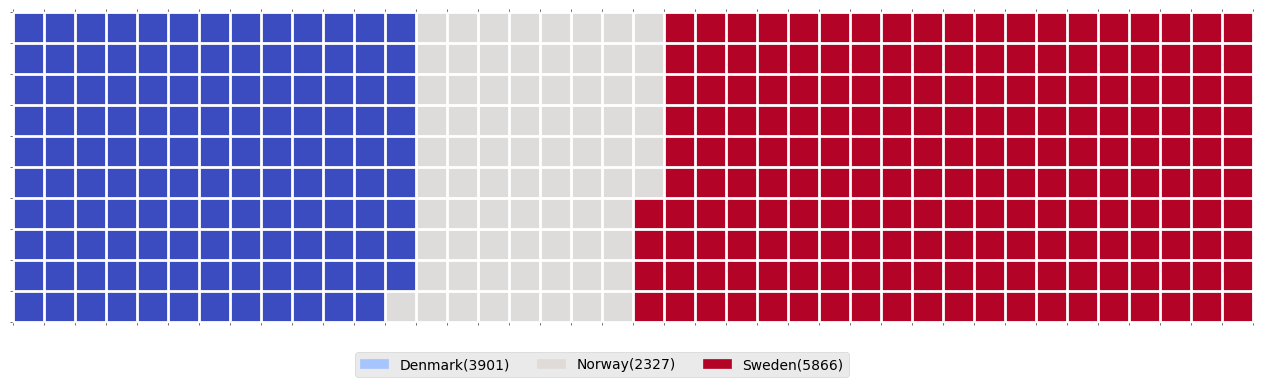

In [101]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)

ax =plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + '(' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

We can create a function to combine all the steps we used to make a waffle chart

In [102]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [103]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

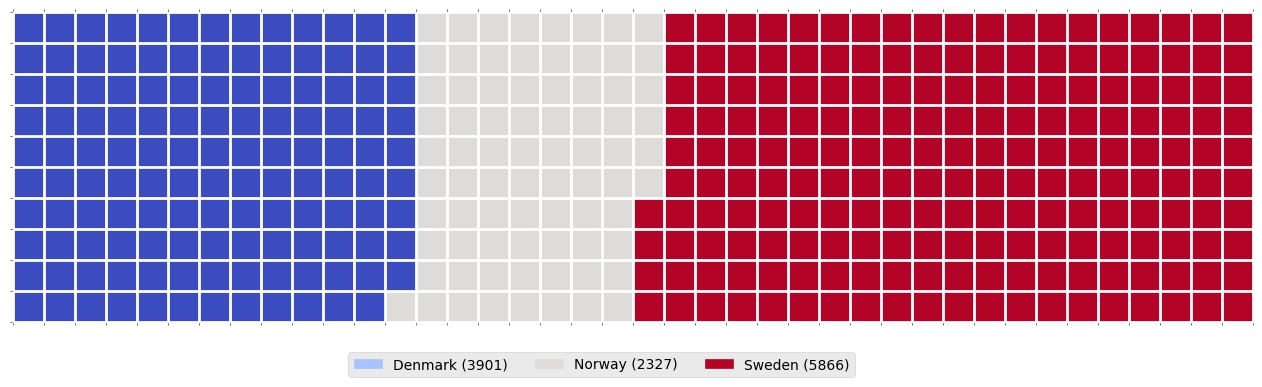

In [104]:
create_waffle_chart(categories, values, height, width, colormap)

An easier method to make waffle charts is using the python library pywaffle.

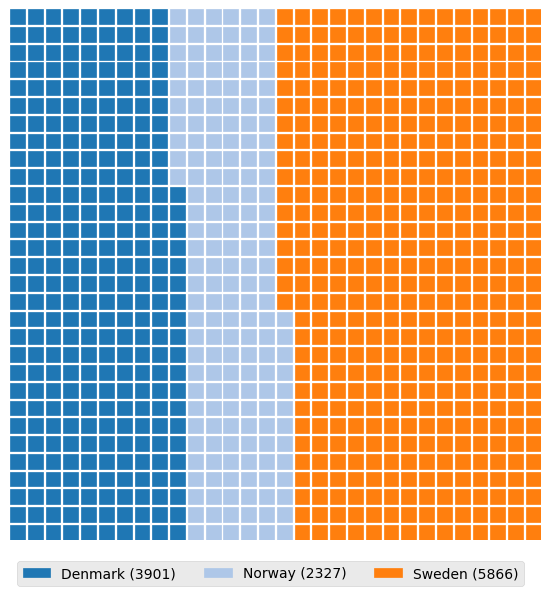

In [114]:
fig = plt.figure(FigureClass = Waffle, 
                 figsize = (10,6),
                 rows = 30, 
                 columns = 30, 
                 values = df_dsn['Total'], 
                 cmap_name = 'tab20', 
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3})
plt.show()

In [115]:

df_chi = df_can.loc[['China', 'India'], :]
df_chi

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


<function matplotlib.pyplot.show(close=None, block=None)>

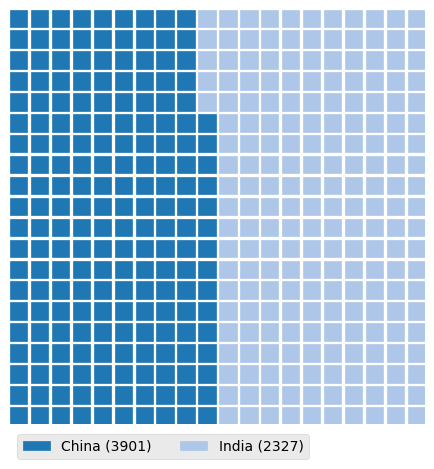

In [116]:
fig = plt.figure(FigureClass = Waffle,
                rows = 20,
                columns = 20,
                values = df_chi['Total'],
                cmap_name = 'tab20',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_chi.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3})

plt.show

Total number of tiles is 400
China: 195
India: 205


<Figure size 640x480 with 0 Axes>

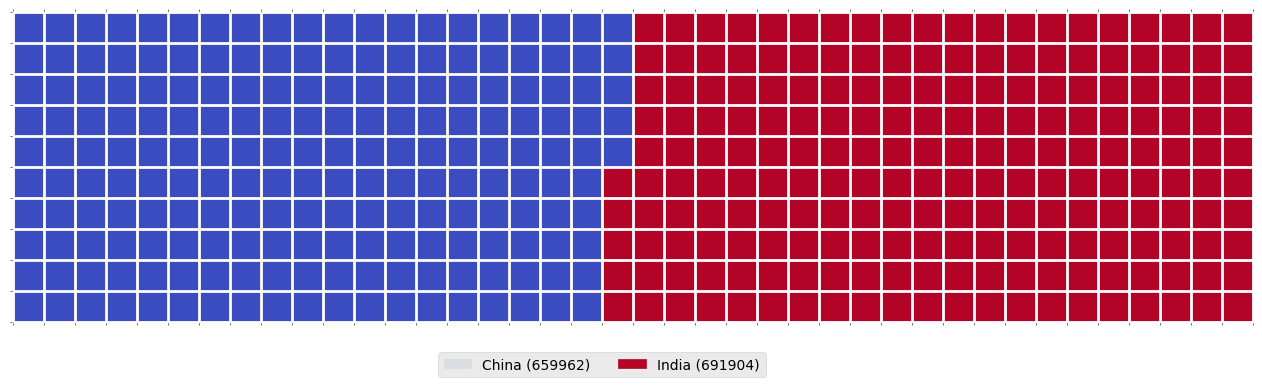

In [117]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_chi.index.values # categories
values = df_chi['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

This is the end of the Exploratory Data Analysis on the dataset of immigration to Canada. In the project, we loaded the data, inspected its shape, type of variables, and other features that are in the original dataset. Then we dropped columns that were not necessary for the project, changed the data types of some columns and column names, and engineered new features that would be helpful in the project such as a column for totals and a list of years. We Used different visualisation tools to assess frequency distribition, numerical proportion, and relationships between different continuous and categorical variables. These are such as scatter plots, bubble plots, line plots, bar charts, pie charts, histograms, waffle charts, and box plots.

The aim of this project was to get a beter understanding of the data so we can start raising awareness of the kind of inferences we can inspect in the data in further stages of analysis. In an application scenario, this would be an early stage of a larger project and we would leave the discussion of the results in a more advanced stage of the project. 

# Authored By:
## Mwenda Kinoti